#### for this , I have used the Titanic dataset from kaggle.com

importing all the required libraries

In [1]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

loading the dataset

In [2]:
data=pd.read_csv('SVMtrain.csv')

displaying the first five rows using the head function

In [3]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


displaying all the columns

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

checking the data types of the columns

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

converting the 'Survived' column which is in int datatype into categorical column, where 0=not survived and 1=survived

In [6]:
data['Survived']=data.Survived.map({0:'Not Survived',1:'Survived'})

converting the 'PClass' column which is in int datatype into categorical column, where
1=First Class  ,  2=Second Class  and 3=Third Class

In [7]:
data['Pclass']=data.Pclass.map({1:'First Class',2:'Second Class',3:'Third Class'})

converting the 'Embarked' column which is in int datatype into categorical column, where
1=Cherbourg , 2=Queenstown  and 3=Saouthampton

In [8]:
data['Embarked']=data.Embarked.map({1:'Cherbourg',2:'Queenstown',3:'Southampton'})

now lets display the first five rows and the data type of the columns after the changes

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,Not Survived,Third Class,Male,22.0,1,0,7.2500,Southampton
1,2,Survived,First Class,female,38.0,1,0,71.2833,Cherbourg
2,3,Survived,Third Class,female,26.0,0,0,7.9250,Southampton
3,4,Survived,First Class,female,35.0,1,0,53.1000,Southampton
4,5,Not Survived,Third Class,Male,35.0,0,0,8.0500,Southampton


In [10]:
data.dtypes

PassengerId      int64
Survived        object
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

#### lets create a countplot to display the number of male and female passangers on board

Text(0.5, 1.0, 'Count of passangers as per gender')

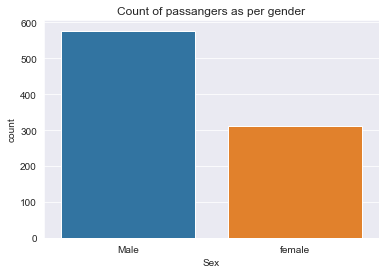

In [11]:
ax=sns.countplot(x='Sex',data=data)
plt.title('Count of passangers as per gender')


from this above plot , we can infer that there were more number of Male passangers on board then Female passangers

#### lets create a plot that displays the number of male and female passanges survived

Text(0.5, 1.0, 'Count of Survived/Non Survived')

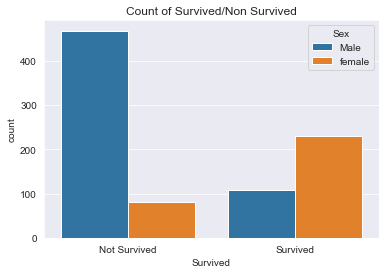

In [12]:
sns.countplot(x='Survived',data=data,hue='Sex')
plt.title('Count of Survived/Non Survived')


from this above plot we can infer that more 'Female' passangers survived in comparison to the 'Male' passangers on board. Also we can see that large number of 'Male' passanges did not survive

#### creating a countplot which displays the number of passangers based on their class of Travel

In [ ]:
sns.countplot(x='Pclass',data=data,hue='Sex')
plt.title('Class of Travel as per Gender')

we can infer that in every class there are more number of Male passangers than Female passangers

#### creating a countplot that displays the count of passangers based on their port of embarked

In [ ]:
sns.countplot(x='Embarked',data=data)
plt.title('Port of Embarked')
plt.xlabel('Port')

from this we can infer that most number of passangers have port of embarked as Southampton

#### lets check if there is any relation between the fare paid by the passanger and the Class of Travel that they prefered

In [ ]:
plt.scatter(x='Pclass',y='Fare',data=data)
plt.title('Relation between Fare and Class of Travel of passangers')

from this we can infer that passangers who travelled by first class paid extra amount than those with second and third class of travel

In [ ]:
data.head()

In [ ]:
data['Survived']=data.Survived.map({'Not Survived':0,'Survived':1})

In [ ]:
data['Pclass']=data.Pclass.map({'First Class':1,'Second Class':2,'Third Class':3})

In [ ]:
data['Embarked']=data.Embarked.map({'Cherbourg':1,'Queenstown':2,'Southampton':3})

In [ ]:
data.head(2)

##### MODEL CREATION

##### Defining the features and the target variable

In [ ]:
x=data[['Pclass','Age','Embarked']]

In [ ]:
y=data['Embarked']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
p1=lr.predict(x_test)

In [ ]:
acc_1=accuracy_score(y_test,p1)

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

In [ ]:
p2=dtc.predict(x_test)

In [ ]:
acc_2=accuracy_score(y_test,p2)

In [ ]:
kmeans=KMeans(n_clusters=2)

In [ ]:
kmeans.fit(x_train,y_train)

In [ ]:
p3=kmeans.predict(x_test)

In [ ]:
acc_3=accuracy_score(y_test,p3)

In [ ]:
matrix=pd.DataFrame({'Model':['Logistic Regression','Decision Tree Classifier','KMeans'],'Score':[acc_1,acc_2,acc_3]})

In [ ]:
matrix

##### from this we can clearly see that the decision tree classifier model works the most accurate